### Import all the necessary packages


In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import sys
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import sqrt
from math import log
from decimal import Decimal
import math

### Load the dataset into memory

In [21]:
baby_dataset = pd.read_csv('baby-weights-dataset2.csv')
print(baby_dataset.columns)

Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE', 'BWEIGHT'],
      dtype='object')


### Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [22]:
print(baby_dataset.columns[36])
bweight_column = baby_dataset.BWEIGHT
print(len(bweight_column))
# Compute Mean
print("mean = ", (np.mean(bweight_column)))
# Compute min
print("min = ", min(bweight_column))
# Compute max
print("max = ", max(bweight_column))
# Compute Standard Deviation
print("stdev = ", bweight_column.std())
# Compute 25% percentile
print("25% = ", bweight_column.quantile(0.25))
# Compute Median
print("Median = ", statistics.median(bweight_column))
# Compute 25% percentile
print("75% = ", bweight_column.quantile(0.75))

BWEIGHT
101400
mean =  7.2580658284023665
min =  0.1875
max =  13.0625
stdev =  1.3294606808999971
25% =  6.625
Median =  7.375
75% =  8.0625


###  histogram plot for the BWEIGHT variable


Text(0.5,1,'Histogram Plot')

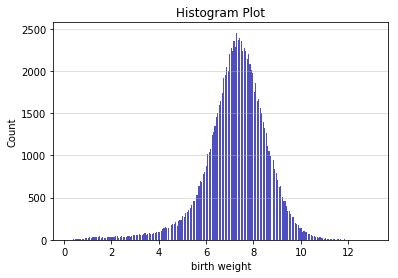

In [23]:
n, bins, patches = plt.hist(x=bweight_column, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.75)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('birth weight')
plt.ylabel('Count')
plt.title('Histogram Plot')


###  Present the skewness and kurtosis of the BWEIGHT target variable

In [24]:
# Skewness
print("Skewness =", bweight_column.skew())
# Kurtosis
print("Kurtosis =",bweight_column.kurt())

Skewness = -0.9365934741551449
Kurtosis = 2.8687798226840977


### Variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 

In [27]:
baby_dataset['HISPMOM'] =baby_dataset['HISPMOM'].astype('category').cat.codes
baby_dataset['HISPDAD'] =baby_dataset['HISPDAD'].astype('category').cat.codes

In [28]:
# Correlation between the'BWEIGHT' and all other features
corr_bw = baby_dataset[baby_dataset.columns[:]].corr()['BWEIGHT'][:]
print(corr_bw)

ID          0.003001
SEX        -0.093440
MARITAL    -0.107106
FAGE        0.051447
GAINED      0.173262
VISITS      0.129587
MAGE        0.068473
FEDUC       0.052673
MEDUC       0.055908
TOTALP      0.003201
BDEAD      -0.036611
TERMS      -0.026878
LOUTCOME   -0.037264
WEEKS       0.565376
RACEMOM    -0.079893
RACEDAD    -0.084056
HISPMOM    -0.015853
HISPDAD    -0.014481
CIGNUM     -0.090670
DRINKNUM   -0.010207
ANEMIA     -0.011487
CARDIAC    -0.000425
ACLUNG     -0.006643
DIABETES    0.010216
HERPES      0.001442
HYDRAM     -0.050001
HEMOGLOB   -0.010994
HYPERCH    -0.043561
HYPERPR    -0.108541
ECLAMP     -0.068073
CERVIX     -0.066935
PINFANT     0.067073
PRETERM    -0.072932
RENAL      -0.007734
RHSEN       0.001985
UTERINE    -0.042741
DISEASE    -0.100695
BWEIGHT     1.000000
Name: BWEIGHT, dtype: float64


In [29]:
corr = abs(corr_bw)
selected_fet = corr[corr>0.009]
len(selected_fet)
baby_dataset = baby_dataset[list(selected_fet.index)]

In [30]:
len(baby_dataset.columns.values)

31

###  Checking for missing data

In [31]:
baby_dataset.isnull().values.any()


False

### Tackle the dummy categorical variables by introducing dummy variables

In [25]:
baby_dataset['DISEASE']=baby_dataset['ANEMIA']+baby_dataset['CARDIAC']+baby_dataset['ACLUNG']+baby_dataset['DIABETES']+baby_dataset['HERPES']+baby_dataset['HYDRAM']+baby_dataset['HEMOGLOB']+baby_dataset['HYPERCH']+baby_dataset['HYPERPR']+baby_dataset['ECLAMP']+baby_dataset['CERVIX']+baby_dataset['PINFANT']+baby_dataset['PRETERM']+baby_dataset['RENAL']+baby_dataset['RHSEN']+baby_dataset['UTERINE']


In [26]:
baby_dataset=baby_dataset[['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE', 'DISEASE', 'BWEIGHT']]

###  Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [32]:
train, test = train_test_split(baby_dataset, test_size=0.2)
print("Train = ", len(train))
print("Test =",len(test))


Train =  81120
Test = 20280


###  On the training dataset, applying a normalization technique

In [34]:
# Using sigmoid 
def sigmoid_activation(x):
    return 1/(1+np.exp(-x))

In [35]:
tra = train.columns 
len(tra)
#train[[tra[28]]]

31

In [36]:
for i in range(len(tra)-1):
    k = train[[tra[i]]]
    train[[tra[i]]] =sigmoid_activation(k)
len(k)
#train[[tra[15]]]
train

C:\Users\shivs\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,BDEAD,TERMS,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,UTERINE,DISEASE,BWEIGHT
83689,0.731059,0.731059,1.0,1.000000,0.999994,1.0,0.999999,0.999994,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,7.6875
84659,0.880797,0.731059,1.0,1.000000,0.999998,1.0,0.999994,0.999999,0.500000,0.731059,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,6.1875
46425,0.880797,0.731059,1.0,1.000000,0.999994,1.0,0.997527,0.997527,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,6.5000
57379,0.880797,0.731059,1.0,1.000000,0.999999,1.0,1.000000,1.000000,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,7.5000
69356,0.731059,0.731059,1.0,1.000000,1.000000,1.0,0.999998,0.999877,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,7.8125
92841,0.731059,0.731059,1.0,1.000000,0.999955,1.0,0.999994,1.000000,0.500000,0.731059,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,9.8125
16633,0.731059,0.731059,1.0,1.000000,0.999999,1.0,0.999994,0.999994,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,7.7500
65193,0.731059,0.731059,1.0,1.000000,0.997527,1.0,0.999994,0.999994,0.500000,0.731059,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,6.0625
41466,0.880797,0.880797,1.0,1.000000,0.999089,1.0,0.999955,0.999983,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,5.9375
60381,0.880797,0.731059,1.0,1.000000,1.000000,1.0,0.999999,1.000000,0.500000,0.500000,...,0.500000,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.500000,7.9375


###  Applying the training data statistics to normalize the testing data as well.

In [37]:
tes = test.columns
for i in range(len(tes)-1):
    k = test[[tes[i]]]
    test[[tes[i]]] = sigmoid_activation(k)
len(k)
test



C:\Users\shivs\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,BDEAD,TERMS,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,UTERINE,DISEASE,BWEIGHT
17352,0.731059,0.731059,1.0,1.000000,0.999998,1.0,0.999998,0.999998,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,7.5625
38563,0.880797,0.731059,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,6.9375
47456,0.880797,0.731059,1.0,1.000000,0.999999,1.0,1.000000,0.999994,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,8.6875
74551,0.880797,0.731059,1.0,1.000000,0.999983,1.0,0.999955,0.999994,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,8.3125
36938,0.731059,0.880797,1.0,1.000000,0.999999,1.0,0.999999,0.999994,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,7.5625
20155,0.731059,0.731059,1.0,0.999999,0.999999,1.0,0.999983,0.999877,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,6.5000
33001,0.880797,0.880797,1.0,1.000000,0.952574,1.0,0.999994,0.999999,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,6.1250
52481,0.731059,0.880797,1.0,1.000000,0.999089,1.0,0.999665,0.880797,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,5.9375
50135,0.731059,0.731059,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.500000,0.731059,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,7.0625
33714,0.880797,0.880797,1.0,1.000000,1.000000,1.0,0.999998,0.999999,0.500000,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,10.2500


###  Finding the linear regression function using Stochastic Gradient Design

In [63]:
# Make a prediction with coefficients
import pdb


def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

def inv_sig(x):
    if x>0:
        inv = math.log(x/(1-x))
        return inv
    else:
        return 0


def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        #pdb.set_trace()
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    return sqrt(sum_error)


def coefficients_sgd(train, l_rate, n_epoch):
    global coef
    coef = [0.0 for i in range(len(baby_dataset.columns.values))]
    for epoch in range(n_epoch):
        for index,row in train.iterrows():
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    return coef

def evaluate_algorithm(train, test, algorithm, *args):
    scores = []
    predicted = algorithm(train, test, *args)
    actual = [row[-1] for index,row in test.iterrows()]
    rmse = rmse_metric(actual, predicted)
    scores.append(rmse)
    return scores


def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for index,row in test.iterrows():
        yhat = predict(row, coef)
        #pdb.set_trace()
        predictions.append(yhat)
    len(predictions)
    return(predictions)

###  Predicting BWEIGHT target variable for each of the testing dataset using the regression line and reporting RMSE(testing) (Root Mean Squared Error)

In [42]:
l_rate = 0.01
n_epoch = 10
#for i in range(15):
scores = evaluate_algorithm(train, test, linear_regression_sgd, l_rate, n_epoch)
print('Scores and epoch no is %s %d' % (scores,  i))
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

Scores and epoch no is [183.77478039152763] 29
Mean RMSE: 183.775


In [43]:
print(coef)

[3.1354235013200262, -1.6665445898641769, -1.0859417915504535, 3.1354248289144326, 1.0372241431037685, 1.8975591786085384, 3.135428367988987, 0.4323077346493955, -0.11186167710005863, -1.263590818387535, -0.1749209099680907, -0.5353085492015834, 3.1354236860595104, -1.4728783722502334, -1.0133320181192587, -0.07685842881343201, 0.18951441484953122, -0.9704090113402813, -0.24662958909457053, 1.043646660741957, 1.5936578138885136, -0.982775889438502, 1.3721187782917907, -0.8589690181993598, -1.5921340555791417, -3.3903124569035157, -3.053035383612132, 5.579871393447568, -2.8095228109654755, -1.5295061818087976, -0.983969068131025]


### additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [45]:
l_rate = 0.01
n_epoch = [5,10,15,20]
for i in range(len(n_epoch)):
    scores = evaluate_algorithm(train, test, linear_regression_sgd, l_rate, n_epoch[i])
    print('RMSE is: %s and n_epoch: is %d' % (scores, n_epoch[i]))

RMSE is: [183.99836296491733] and n_epoch: is 5
RMSE is: [183.77478039152763] and n_epoch: is 10
RMSE is: [183.67853060096317] and n_epoch: is 15
RMSE is: [183.62518340026773] and n_epoch: is 20


###  Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [54]:
RMSE = [183.99836, 183.77478, 183.67853, 183.62518, 183.775]
RMSE_avg = sum(RMSE) / float(len(RMSE))
Stdev = np.std(RMSE, axis=0)
#Stdev = sqrt(mean(abs(RMSE - RMSE_avg)**2))
RMSE_test = RMSE_avg+Stdev
print(RMSE_test)

183.89806890116992


### linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed above).

In [68]:
train1 = baby_dataset
for i in range(len(tra)-1):
    k = train1[[tra[i]]]
    train1[[tra[i]]] =sigmoid_activation(k)
len(k)
#train[[tra[15]]]
train1

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,BDEAD,TERMS,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,UTERINE,DISEASE,BWEIGHT
0,0.880797,0.731059,1.0,1.000000,0.999955,1.0,0.999994,0.982014,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,4.3750
1,0.880797,0.880797,1.0,1.000000,0.999955,1.0,0.999983,0.999994,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,6.9375
2,0.880797,0.731059,1.0,1.000000,0.999999,1.0,1.000000,1.000000,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,8.5000
3,0.731059,0.731059,1.0,1.000000,1.000000,1.0,0.999994,0.999994,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,8.5000
4,0.731059,0.880797,1.0,1.000000,0.999998,1.0,0.999994,0.999999,0.5,0.500000,...,0.5,0.500000,0.731059,0.5,0.5,0.5,0.500000,0.5,0.731059,9.0000
5,0.731059,0.731059,1.0,1.000000,1.000000,1.0,0.999994,0.999998,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,8.0000
6,0.731059,0.880797,1.0,1.000000,0.999983,1.0,0.997527,0.997527,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,7.0000
7,0.880797,0.880797,1.0,1.000000,1.000000,1.0,0.999998,0.999998,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,7.3750
8,0.880797,0.731059,1.0,0.500000,0.999994,1.0,0.999955,0.999998,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,8.1875
9,0.731059,0.731059,1.0,1.000000,0.999955,1.0,0.999994,0.999999,0.5,0.500000,...,0.5,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.500000,7.0625


In [69]:
l_rate = 0.01
n_epoch =2
scores = coefficients_sgd(train1, l_rate, n_epoch)
print(coef)

[1.9115561714383162, -1.6131552337796036, -1.0425953216587758, 1.9115564476477265, 0.9524587571220202, 2.03338567870872, 1.9115569982066711, 0.8351182622160365, 0.5805868424482863, -0.8221177179852808, -0.0002889003688552683, -0.42192847548441553, 1.9115562190363558, -1.5351983504623372, -1.0170524740578863, -0.07281999325622975, 0.19568832119630744, -0.9738496727245644, 0.4547551394160405, 1.3846128620092506, 2.008945466460351, -0.388350250772786, 0.9945937852489257, -0.21442983277643715, -1.3857489323396208, -0.8829892313572254, -0.800225853042067, 3.2599035309821156, -1.326724064474633, -0.12239562549038992, -1.4101085684913122]


### Preprocessing the judge-without-label.csv file according টo the strategy applied above on the whole dataset

In [70]:
judge = pd.read_csv('judge-without-labels.csv')
judge['BWEIGHT'] = 0

In [72]:
judge['DISEASE']=judge['ANEMIA']+judge['CARDIAC']+judge['ACLUNG']+judge['DIABETES']+judge['HERPES']+judge['HYDRAM']+judge['HEMOGLOB']+judge['HYPERCH']+judge['HYPERPR']+judge['ECLAMP']+judge['CERVIX']+judge['PINFANT']+judge['PRETERM']+judge['RENAL']+judge['RHSEN']+judge['UTERINE']


In [73]:
judge['HISPMOM'] =judge['HISPMOM'].astype('category').cat.codes
judge['HISPDAD'] =judge['HISPDAD'].astype('category').cat.codes
judge = judge[list(selected_fet.index)]
judge.columns

Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD', 'HISPMOM',
       'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'DIABETES', 'HYDRAM',
       'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT',
       'PRETERM', 'UTERINE', 'DISEASE', 'BWEIGHT'],
      dtype='object')

In [74]:
judge.isnull().values.any()
len(judge.columns)

31

In [75]:
for i in range(len(judge.columns)-1):
    k = judge[[judge.columns[i]]]
    judge[[judge.columns[i]]] = sigmoid_activation(k)
len(k)
#train[[tra[15]]]
judge

C:\Users\shivs\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,BDEAD,TERMS,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,UTERINE,DISEASE,BWEIGHT
0,0.731059,0.731059,1.0,1.000000,0.999983,1.0,0.999999,1.000000,0.500000,0.952574,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.500000,0
1,0.880797,0.880797,1.0,1.000000,1.000000,1.0,0.999877,0.999994,0.500000,0.500000,...,0.731059,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.880797,0
2,0.880797,0.731059,1.0,1.000000,0.999955,1.0,0.999994,0.999994,0.500000,0.952574,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.880797,0
3,0.880797,0.731059,1.0,1.000000,0.999955,1.0,0.999994,0.999983,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.500000,0
4,0.880797,0.731059,1.0,1.000000,1.000000,1.0,0.999994,0.999994,0.500000,0.500000,...,0.500000,0.500000,0.731059,0.5,0.500000,0.5,0.5,0.500000,0.731059,0
5,0.731059,0.880797,1.0,1.000000,0.993307,1.0,0.999994,1.000000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.731059,0
6,0.880797,0.731059,1.0,0.999994,0.999089,1.0,0.999955,0.999955,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.500000,0
7,0.731059,0.731059,1.0,1.000000,0.999955,1.0,0.999994,0.999998,0.500000,0.731059,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.500000,0
8,0.731059,0.880797,1.0,1.000000,1.000000,1.0,1.000000,0.999998,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.5,0.500000,0.500000,0
9,0.731059,0.731059,1.0,1.000000,0.999955,1.0,1.000000,1.000000,0.500000,0.500000,...,0.500000,0.500000,0.731059,0.5,0.500000,0.5,0.5,0.500000,0.731059,0


### Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and saving the results in judge-submission-run-1.csv in the format below. 

In [76]:
jud = judge.columns
yhat = []
for index,row in judge.iterrows():
    yhat.append(predict(row, coef))
    #print(index,yhat)

In [79]:
judges = pd.read_csv('judge-without-labels.csv')
judges['BWEIGHT'] = yhat
len(judges.columns)
#judges
df1 = judges[['ID','BWEIGHT']].to_csv('judge-submission-run1.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

###  Repeating tasks 9-12 three times, and calculating the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [82]:
size = [1,2,3]
rmse = []
for i in range(len(size)):
    train, test = train_test_split(baby_dataset, test_size=0.2, random_state=42)
    tra = train.columns 
    for j in range(len(tra)-1):
        k = train[[tra[j]]]
        train[[tra[j]]] =sigmoid_activation(k)
    tes = test.columns
    for l in range(len(tes)-1):
        k = test[[tes[l]]]
        test[[tes[l]]] = sigmoid_activation(k)
    l_rate = 0.01
    n_epoch =5
    scores = evaluate_algorithm(train, test, linear_regression_sgd, l_rate, n_epoch)
    rmse.append(scores)
    print('RMSE is: %s' %scores)
    print("Coefficients are:")
    print(coef)

C:\Users\shivs\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


RMSE is: [195.9704619808638]
Coefficients are:
[2.8374574081486195, -4.0736677835970845, -2.75358197810402, 2.074347746796459, 4.0946119751039145, 3.5604018030675797, 2.07434821376255, 1.9422540857444572, 1.7698893842196468, 0.5130007018927555, -0.16165896368774335, -1.7163286396683477, 2.074347599934642, -4.8899962587214185, -4.518568934765207, 0.6090903535722639, 0.9402801476608296, -4.336841023419594, 1.546937821639152, 2.173912359408212, 2.915679047988053, 0.3985677750354735, 1.721034914224294, 0.8205413059533507, -2.7276255996495933, 0.656339499357305, 0.7054051210943695, 3.1301744816399792, 0.11540908512620354, 1.1225490254953292, -4.680167529497215]
RMSE is: [195.9704619808638]
Coefficients are:
[2.8374574081486195, -4.0736677835970845, -2.75358197810402, 2.074347746796459, 4.0946119751039145, 3.5604018030675797, 2.07434821376255, 1.9422540857444572, 1.7698893842196468, 0.5130007018927555, -0.16165896368774335, -1.7163286396683477, 2.074347599934642, -4.8899962587214185, -4.5185

In [85]:
rmse = [195.97046, 195.97046, 195.97046]

In [86]:
RMSE_avg = sum(rmse) / float(len(rmse))
Stdev = np.std(rmse, axis=0)
#Stdev = sqrt(mean(abs(RMSE - RMSE_avg)**2))
RMSE_test = RMSE_avg+Stdev
print(RMSE_test)

195.97046


### Kaggle Submission 

![Scores of files submitted](Capture.PNG)





